# Arvore de Decisão

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [20]:
dados = pd.read_csv('churnextra.csv')

In [5]:
dados.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [21]:
X = dados.loc[:, dados.columns != 'churn']
X = pd.get_dummies(X)

y = dados[["churn"]]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)

Com os dados convertidos, temos que converter também a coluna alvo para número. 

Utilizando o conceito de função lambda visto em aulas anteriores, iremos converter a string não para 0 e a string sim para 1.

Com os dados convertidos, iremos utilizar a biblioteca `scikit-learn` que já implementa o classificador - Árvore de Decisão.

In [22]:
from sklearn import tree

In [23]:
arvore_decisao = tree.DecisionTreeClassifier()

In [24]:
modelo_ad = arvore_decisao.fit(X, y)

ValueError: ignored

In [25]:
#Predict the response for test dataset
y_pred = modelo_ad.predict(X_test)

In [18]:
modelo_ad

DecisionTreeClassifier()

In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Note que por padrão utiliza-se o critério GINI para realizar a divisão.

### Criando a visualização da Árvore:

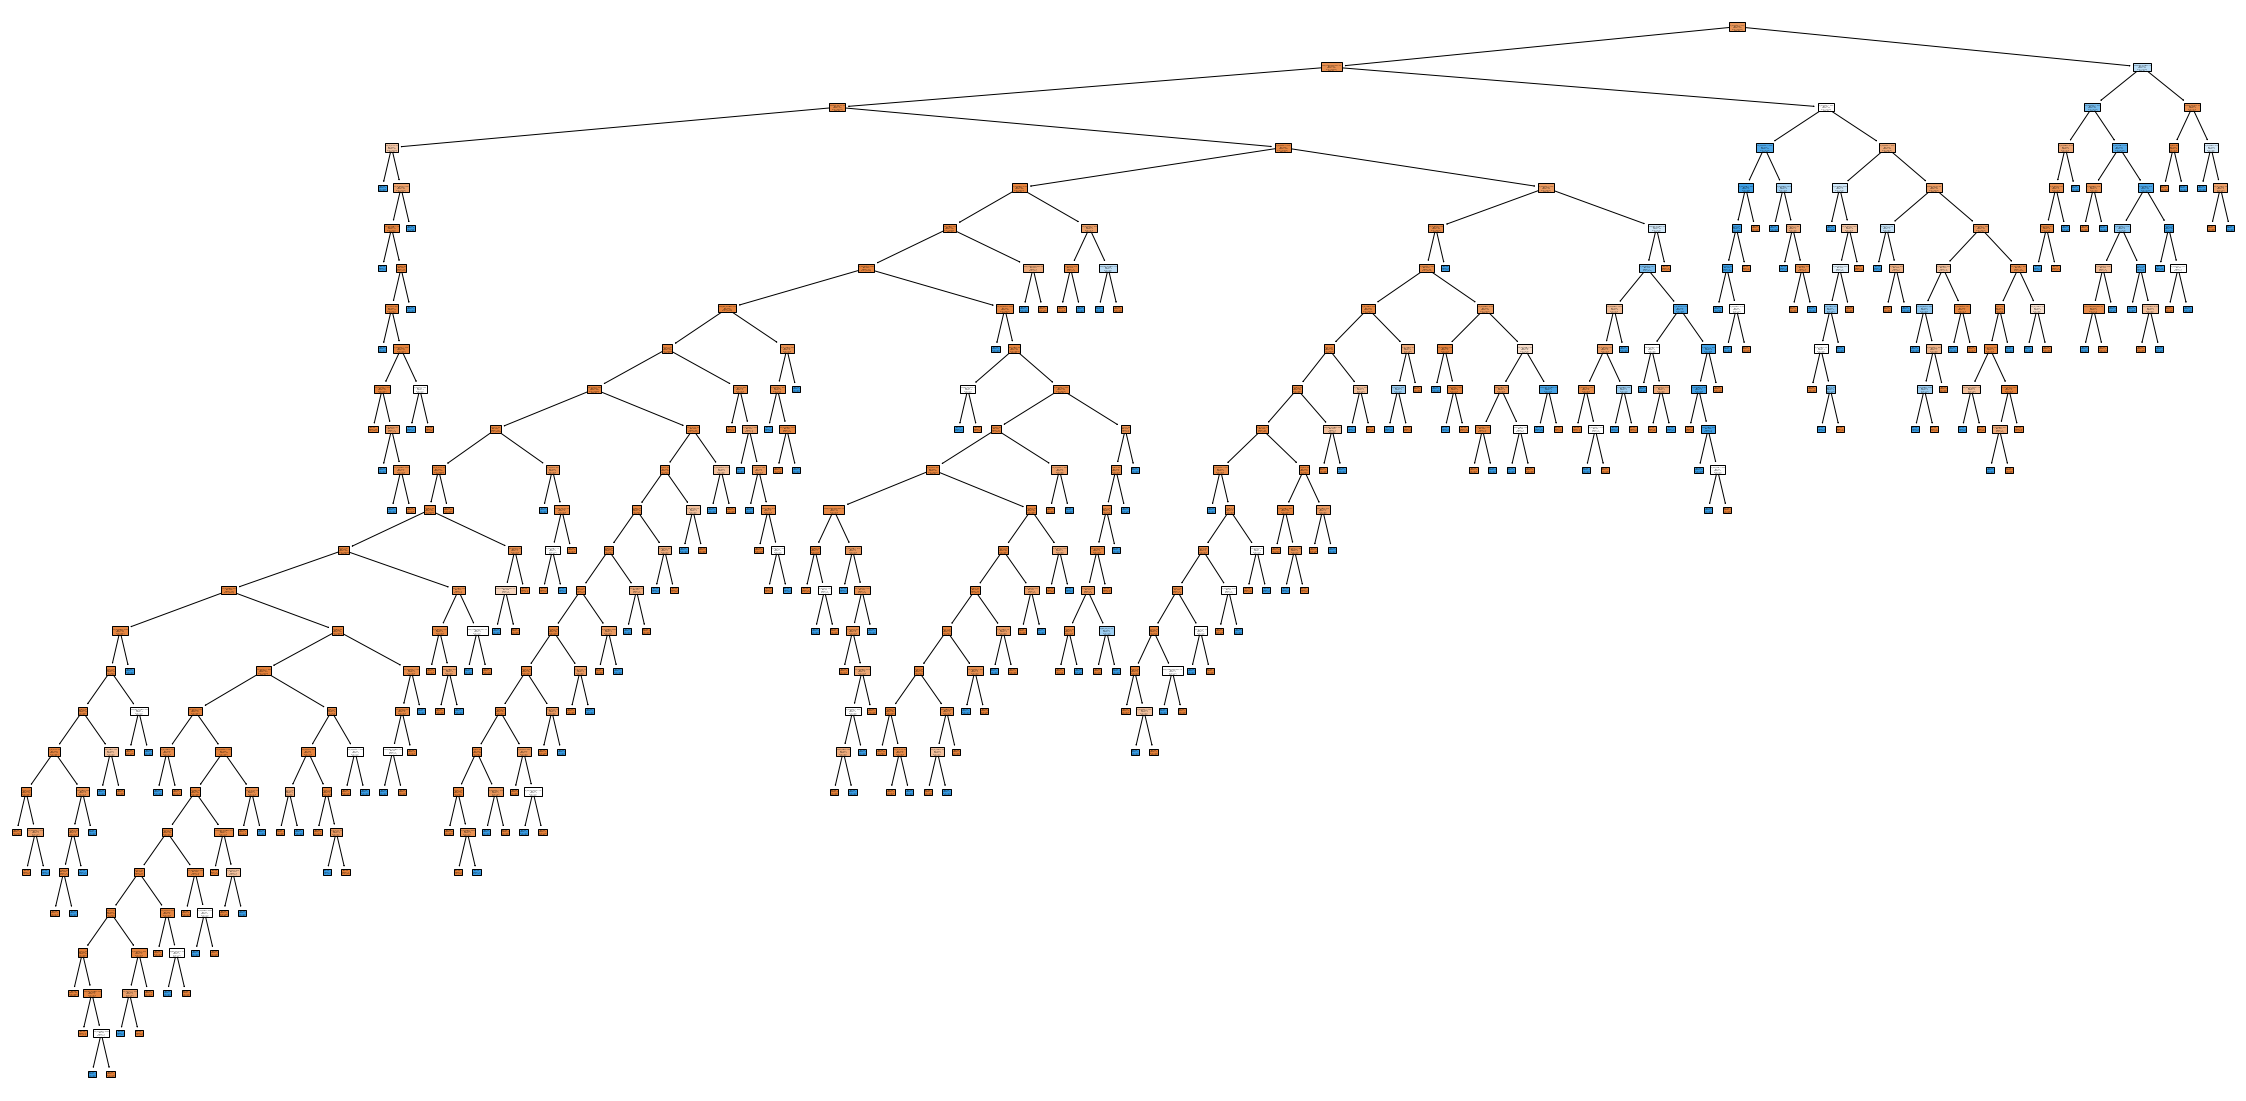

In [15]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))

_ = tree.plot_tree(modelo_ad,
                   feature_names=X.columns,
                   class_names=['Yes', "No"],
                   filled=True)

In [16]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test